In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from fancyimpute import KNN 
import os
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from scipy import stats
%matplotlib inline

C:\Users\deekshitha.r\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
# check Working directory
os.getcwd()

'C:\\Users\\deekshitha.r'

In [3]:
#Load data
df_day=pd.read_csv("Bike_Rental_Prediction.csv")

In [4]:
#Print the data
df_day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [5]:
#Shape of the data
df_day.shape

(731, 16)

In [6]:
#Describing the data
df_day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
#Data information
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
#Data consist of Integers, Float and Object(categorical) variables 

# Exploratory Data Analysis

In [9]:
# Target variable  analysis

#descriptive statistics summary
df_day['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

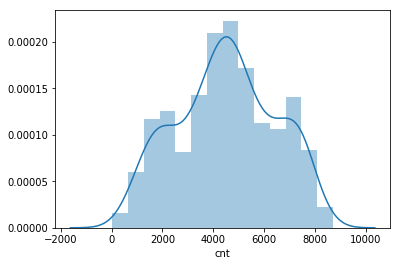

In [10]:
#Check whether the target variable is normal or not
sns.distplot(df_day['cnt']);

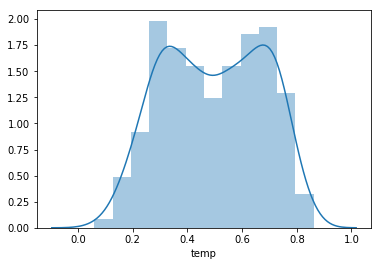

In [11]:
#Distribution  independent numeric variables 

#Check whether  variable 'temp'is normal or not
sns.distplot(df_day['temp']);

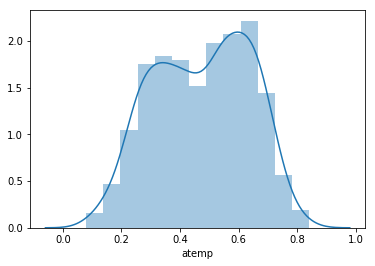

In [12]:
#Check whether the variable 'atemp'is normal or not
sns.distplot(df_day['atemp']);

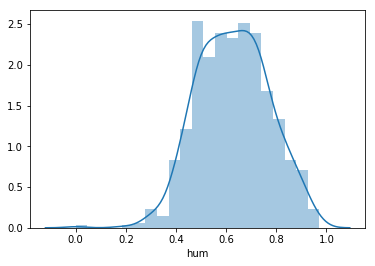

In [13]:
#Check whether the variable 'hum'is normal or not
sns.distplot(df_day['hum']);

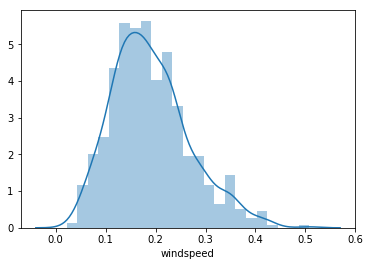

In [14]:
#Check whether the variable 'windspeed'is normal or not
sns.distplot(df_day['windspeed']);

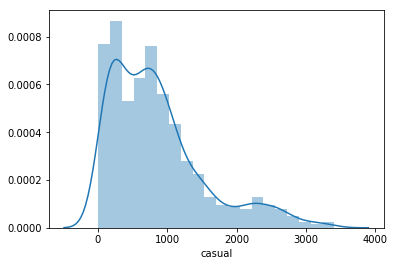

In [15]:
#Check whether the variable 'casual'is normal or not
sns.distplot(df_day['casual']);

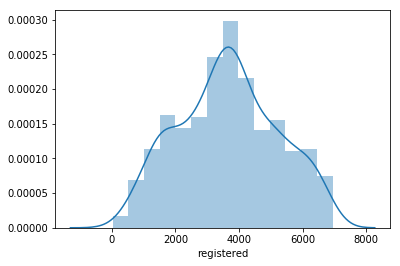

In [16]:
#Check whether the variable 'registered'is normal or not
sns.distplot(df_day['registered'])

In [17]:
# From the above observation, we can clearly see the outlier is present in  'casual' varible

In [18]:
# Skewness & Kurtosis
print("Skewness: %f" % df_day['cnt'].skew())
print("Kurtosis: %f" % df_day['cnt'].kurt())

Skewness: -0.047353
Kurtosis: -0.811922


In [19]:
#Here Skewness is very less. So, target variable is a normal distribution

## Bivariate  Relationship

In [20]:
#Relation between Numerical Variable 'temp' and target variable 'cnt'

df_day['temp'].value_counts()

0.265833    5
0.635000    5
0.437500    4
0.564167    4
0.649167    4
0.484167    4
0.680000    4
0.696667    4
0.710833    4
0.514167    3
0.282500    3
0.667500    3
0.459167    3
0.554167    3
0.733333    3
0.636667    3
0.606667    3
0.342500    3
0.731667    3
0.653333    3
0.393333    3
0.530000    3
0.343333    3
0.414167    3
0.353333    3
0.577500    3
0.775000    3
0.715833    3
0.274167    3
0.550000    3
           ..
0.834167    1
0.381667    1
0.346667    1
0.765833    1
0.640833    1
0.415833    1
0.545000    1
0.359167    1
0.365833    1
0.623333    1
0.160870    1
0.365217    1
0.712500    1
0.348696    1
0.096522    1
0.538333    1
0.361667    1
0.715000    1
0.711667    1
0.343478    1
0.335833    1
0.570000    1
0.282609    1
0.396667    1
0.404167    1
0.226957    1
0.354167    1
0.580833    1
0.231667    1
0.337500    1
Name: temp, Length: 499, dtype: int64

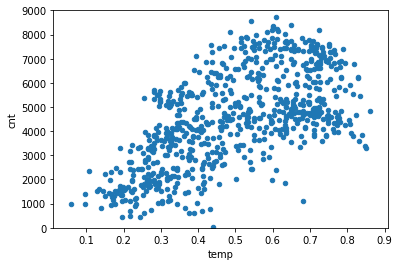

In [21]:
#Will draw scatter plot between 'temp' and 'cnt' variables

var = 'temp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

In [22]:
# It is showing  there is good relationship between 'temp' and 'cnt'

In [23]:
# Relationship between Numerical Variable 'atemp' and target variable 'cnt'
df_day['atemp'].value_counts()

0.654688    4
0.637008    3
0.375621    3
0.542929    2
0.603554    2
0.537896    2
0.243058    2
0.351629    2
0.594704    2
0.450121    2
0.387608    2
0.242400    2
0.298422    2
0.724121    2
0.611121    2
0.595346    2
0.378779    2
0.594083    2
0.398350    2
0.425492    2
0.574500    2
0.607962    2
0.522721    2
0.318812    2
0.654042    2
0.466525    2
0.325750    2
0.703292    2
0.607975    2
0.654054    2
           ..
0.326379    1
0.565217    1
0.228587    1
0.497463    1
0.338383    1
0.255679    1
0.542925    1
0.513242    1
0.533450    1
0.565067    1
0.445062    1
0.647100    1
0.513848    1
0.355425    1
0.645846    1
0.412237    1
0.116175    1
0.274621    1
0.707071    1
0.188413    1
0.323867    1
0.456429    1
0.150888    1
0.761367    1
0.461483    1
0.612379    1
0.464021    1
0.624371    1
0.512621    1
0.538521    1
Name: atemp, Length: 690, dtype: int64

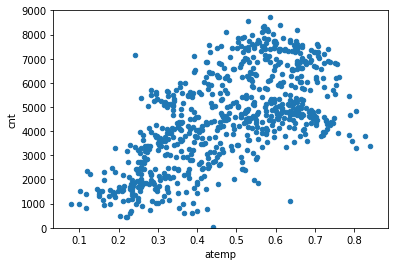

In [24]:
#Will draw scatter plot between 'atemp' and 'cnt' variables

var = 'atemp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

In [25]:
# This is also showing there is good relationship between 'atemp' and 'cnt'

In [26]:
#Relation between Numerical Variable 'hum' and target variable 'cnt'

df_day['hum'].value_counts()

0.613333    4
0.568333    3
0.542500    3
0.752917    3
0.697083    3
0.630833    3
0.605000    3
0.590000    3
0.690000    3
0.729583    3
0.741250    3
0.552083    3
0.590417    3
0.483333    3
0.722917    3
0.538333    3
0.570000    3
0.862500    2
0.757500    2
0.434167    2
0.441250    2
0.672917    2
0.537917    2
0.410000    2
0.677500    2
0.805833    2
0.734583    2
0.668750    2
0.540833    2
0.694167    2
           ..
0.642500    1
0.422500    1
0.494167    1
0.616957    1
0.700833    1
0.640417    1
0.187917    1
0.414583    1
0.559167    1
0.691250    1
0.581667    1
0.561667    1
0.720417    1
0.896667    1
0.838750    1
0.797083    1
0.426250    1
0.457500    1
0.618333    1
0.609167    1
0.812917    1
0.810833    1
0.537500    1
0.712500    1
0.704167    1
0.615000    1
0.686667    1
0.480833    1
0.649565    1
0.741739    1
Name: hum, Length: 595, dtype: int64

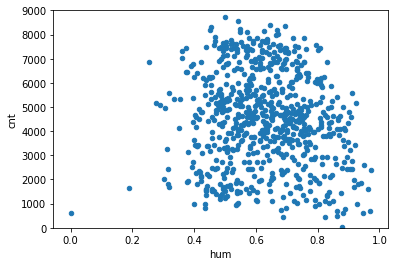

In [27]:
#Will draw scatter plot between 'hum' and 'cnt' variables

var = 'hum'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

In [28]:
# This is showing there is an average relation between 'atemp' and 'cnt'

In [29]:
#Relationship between Numerical Variable 'windspeed' and target variable 'cnt'

df_day['windspeed'].value_counts()

0.228858    3
0.118792    3
0.134954    3
0.149883    3
0.166667    3
0.110700    3
0.136817    3
0.167912    3
0.106350    3
0.116908    2
0.342667    2
0.157350    2
0.144904    2
0.121896    2
0.146775    2
0.102000    2
0.130600    2
0.296037    2
0.215792    2
0.361950    2
0.131221    2
0.122512    2
0.266175    2
0.140550    2
0.118167    2
0.063450    2
0.133721    2
0.168726    2
0.230725    2
0.236937    2
           ..
0.293961    1
0.117562    1
0.139308    1
0.077125    1
0.064071    1
0.147392    1
0.132467    1
0.162938    1
0.207721    1
0.271158    1
0.115522    1
0.225754    1
0.200875    1
0.237567    1
0.197763    1
0.213009    1
0.169779    1
0.136926    1
0.215804    1
0.103863    1
0.284829    1
0.193417    1
0.292287    1
0.093921    1
0.125621    1
0.388067    1
0.185333    1
0.189667    1
0.290421    1
0.415429    1
Name: windspeed, Length: 650, dtype: int64

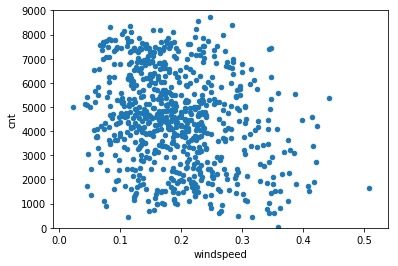

In [30]:
#Now draw scatter plot between 'windspeed' and 'cnt' variables

var = 'windspeed'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

In [31]:
# It is showing there is a nagative relationship between 'windspeed' and 'cnt'

### Box Plot

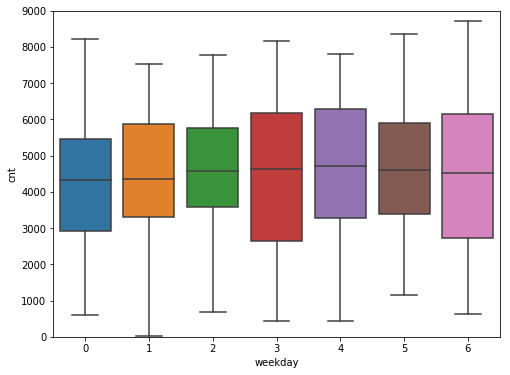

In [32]:
#box plot 'Weekdays' with 'CNT'
var_weekdays = 'weekday'
data = pd.concat([df_day['cnt'], df_day[var_weekdays]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_weekdays, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

In [33]:
# Above Boxplot is saying that for all the weekdays median in between 4000 - 5000

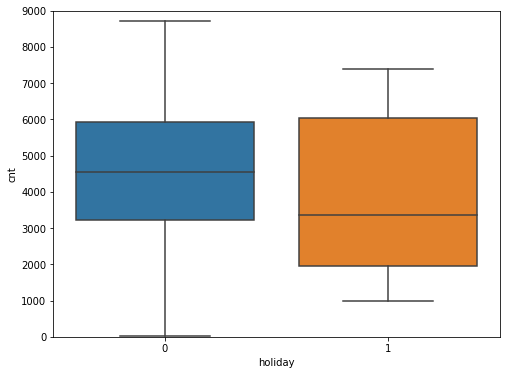

In [34]:
#box plot 'weekends' with 'CNT'
var_holiday = 'holiday'
data = pd.concat([df_day['cnt'], df_day[var_holiday]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_holiday, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

In [35]:
#Above Boxplot is saying that median  high on holidays when compared to weekdays

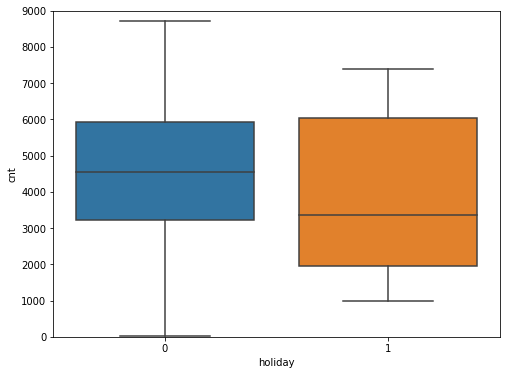

In [36]:
#box plot 'weekends' with 'CNT'
var_holiday = 'holiday'
data = pd.concat([df_day['cnt'], df_day[var_holiday]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_holiday, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

In [37]:
#Above Boxplot is saying that median is high on holidays when compare to weekdays

# Data Preprocessing

## Missing Values

In [38]:
#total_missing_value

total_missing_values = df_day.isnull().sum().sort_values(ascending=False)

total = df_day.isnull().sum().sort_values(ascending=False)
percent = (df_day.isnull().sum()/df_day.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total  Percent
cnt             0      0.0
registered      0      0.0
casual          0      0.0
windspeed       0      0.0
hum             0      0.0
atemp           0      0.0
temp            0      0.0
weathersit      0      0.0
workingday      0      0.0
weekday         0      0.0
holiday         0      0.0
mnth            0      0.0
yr              0      0.0
season          0      0.0
dteday          0      0.0
instant         0      0.0

In [39]:
#Here the six numeric variables are present.
#Out of six, four variables are in normalize form  
#  temp,atem,hum,windspread  are in  normalize form. So No need to check outliers

#casual and registered  have to check outliers

#Let's make a copy of our data

df_day_1 =  df_day.copy()

## Outlier Analysis

In [40]:
##Top 5 rows of the data
df_day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

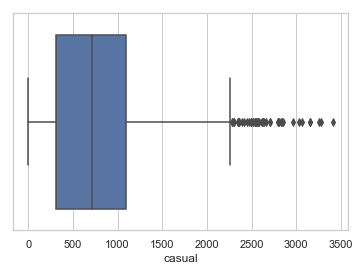

In [41]:
#Correlation between the Casual
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_day['casual'],orient ='h')

In [42]:
#There seems to be an Outliers are present  in 'Casual' variable  
#But we are keeping as it is. Will detect and  conver outliers  during tuning process

0.6728044333386831

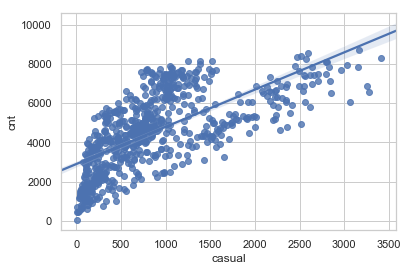

In [43]:
# Correlation before  outlier treatment

# Correlation between 'casual' and 'cnt'  before  removal of  outliers
sns.regplot(x="casual", y="cnt", data=df_day);

df_day['casual'].corr(df_day['cnt'])

In [44]:
#Let us print min & max

cnames = ['casual']
for i in cnames:
    q75, q25 = np.percentile(df_day.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
     
        
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

-855.25
2266.75


In [45]:
#Let us make a copy differntly
df_day_out = df_day.copy()

In [46]:
# df_day_out with min & max

df_day_out = df_day_out.drop(df_day_out[df_day_out.loc[:,i] < min].index)
df_day_out = df_day_out.drop(df_day_out[df_day_out.loc[:,'casual'] > max].index)

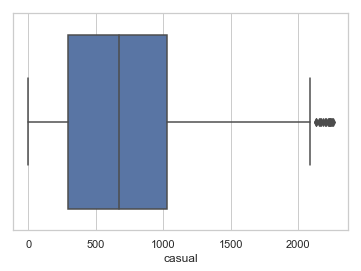

In [47]:
# Boxplot for 'casual' after an outlier removal

sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=df_day_out['casual'],orient ='h')

0.6460020508747333

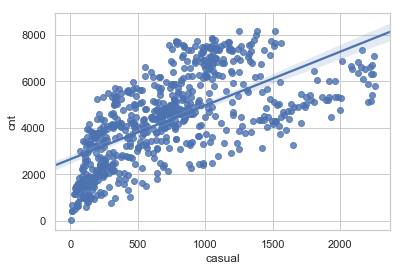

In [48]:
# Correlation between 'casual' and 'cnt'  after  removal of outliers
sns.regplot(x="casual", y="cnt", data=df_day_out);

df_day_out['casual'].corr(df_day_out['cnt'])

## Feature Selection

In [49]:
#Top 5 rows of the data
df_day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [50]:
#Selection of the numerical feature based on the pearson corelation

day_numeric = df_day.loc[:,['temp','atemp','hum','windspeed','casual','registered','cnt']]

In [51]:
#shape
day_numeric.shape

(731, 7)

In [52]:
#draw  correlation matrix between all  numeric variables and analyse  what are the variables are important

day_numeric.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

C:\Users\deekshitha.r\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


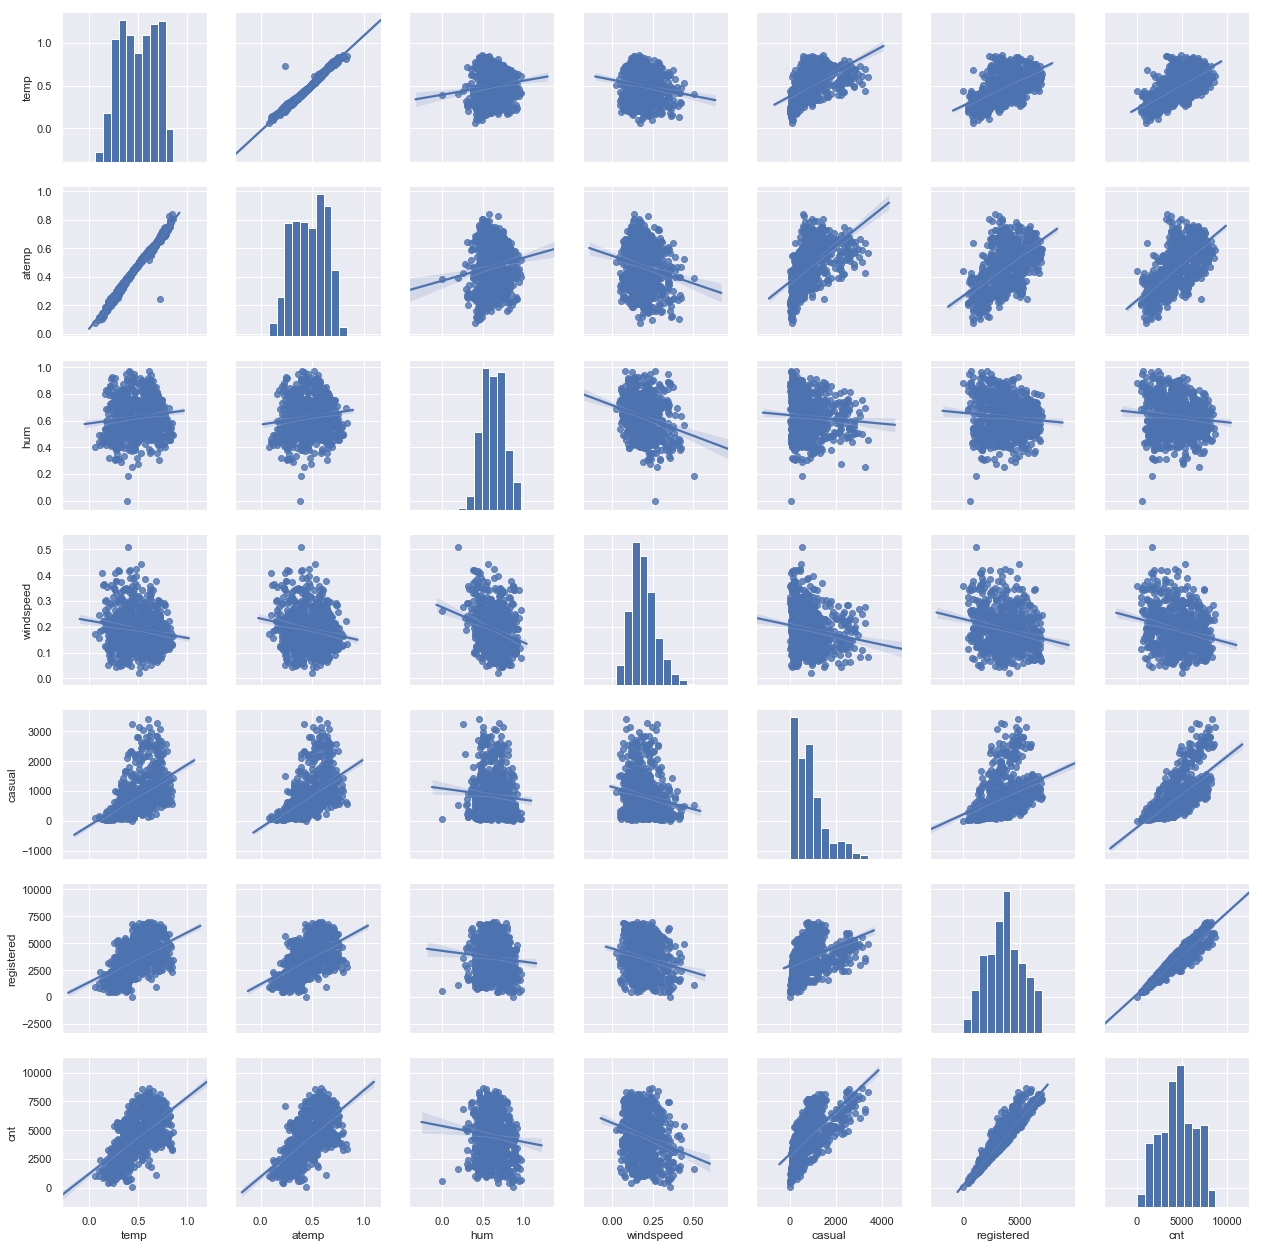

In [53]:
# check relationship with scatter plots

sns.set()
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(day_numeric[cols], size = 2.5,kind="reg")
plt.show();

In [54]:
#As per scatter plots and above Correlation  graph there is strong relation 
#Independent variable   'temp' and 'atemp'
# There is a poor relation between  Independent variable 'hum' and dependent  variable 'cnt'

# so dropping two variables for feature selection

numeric_features = day_numeric.loc[:,['temp', 'windspeed', 'casual', 'registered', 'cnt']]

In [55]:
#Top 5 rows of data
numeric_features.head()

temp  windspeed  casual  registered   cnt
0  0.344167   0.160446     331         654   985
1  0.363478   0.248539     131         670   801
2  0.196364   0.248309     120        1229  1349
3  0.200000   0.160296     108        1454  1562
4  0.226957   0.186900      82        1518  1600

In [56]:
#shape
numeric_features.shape

(731, 5)

In [57]:
#Now  for variable  not doing  Data Scaling  this will do during tuning process

In [58]:
#new
df_day_feature_selection = df_day.drop(['atemp','hum'],axis = 1)

In [59]:
#shape
df_day_feature_selection.shape

(731, 14)

# Modelling

In [60]:
#dividing  Test and train data  using skilearn   train_test_split 
from sklearn.model_selection import train_test_split

In [61]:
#Let us divide train & test
train, test = train_test_split(df_day_feature_selection, test_size=0.2)

In [62]:
#train shape
train.shape

(584, 14)

In [63]:
#train head
train.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
209      210  2011-07-29       3   0     7        0        5           1   
460      461  2012-04-05       2   1     4        0        4           1   
211      212  2011-07-31       3   0     7        0        0           0   
427      428  2012-03-03       1   1     3        0        6           0   
669      670  2012-10-31       4   1    10        0        3           1   

     weathersit      temp  windspeed  casual  registered   cnt  
209           1  0.838333   0.174138     670        3176  3846  
460           1  0.435000   0.219529    1192        5265  6457  
211           1  0.805833   0.164813    1524        2778  4302  
427           2  0.414167   0.161079     956        3110  4066  
669           2  0.357500   0.166667     419        5147  5566

In [64]:
#test shape
test.shape

(147, 14)

In [65]:
#test head
test.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
624      625  2012-09-16       3   1     9        0        0           0   
396      397  2012-02-01       1   1     2        0        3           1   
316      317  2011-11-13       4   0    11        0        0           0   
18        19  2011-01-19       1   0     1        0        3           1   
189      190  2011-07-09       3   0     7        0        6           0   

     weathersit      temp  windspeed  casual  registered   cnt  
624           1  0.580000   0.090183    2166        5167  7333  
396           1  0.469167   0.189067     304        4275  4579  
316           1  0.440833   0.281721    1004        2713  3717  
18            2  0.292174   0.208317      78        1572  1650  
189           1  0.733333   0.167912    1988        3348  5336

In [66]:
#specific locations
train.iloc[:,2:13]

season  yr  mnth  holiday  weekday  workingday  weathersit      temp  \
209       3   0     7        0        5           1           1  0.838333   
460       2   1     4        0        4           1           1  0.435000   
211       3   0     7        0        0           0           1  0.805833   
427       1   1     3        0        6           0           2  0.414167   
669       4   1    10        0        3           1           2  0.357500   
97        2   0     4        0        5           1           2  0.335833   
721       1   1    12        0        6           0           1  0.265833   
16        1   0     1        1        1           0           2  0.175833   
217       3   0     8        0        6           0           2  0.716667   
347       4   0    12        0        3           1           2  0.317500   
555       3   1     7        0        1           1           2  0.710833   
105       2   0     4        0        6           0           3  0.430833   
4         1   0     1        0        3           1           1  0.226957   
287       4   0    10        0        6           0           1  0.506667   
397       1   1     2        0        4           1           2  0.399167   
681       4   1    11        1        1           0           1  0.485000   
180       3   0     6        0        4           1           1  0.696667   
412       1   1     2        0        5           1           1  0.343333   
715       4   1    12        0        0           0           2  0.362500   
570       3   1     7        0        2           1           1  0.750833   
375       1   1     1        0        3           1           2  0.274167   
419       1   1     2        0        5           1           2  0.407500   
678       4   1    11        0        5           1           1  0.361667   
429       1   1     3        0        1           1           1  0.243333   
92        2   0     4        0        0           0           1  0.378333   
304       4   0    11        0        2           1           1  0.400833   
444       1   1     3        0        2           1           1  0.560833   
130       2   0     5        0        3           1           1  0.542500   
618       3   1     9        0        1           1           1  0.583333   
438       1   1     3        0        3           1           1  0.572500   
..      ...  ..   ...      ...      ...         ...         ...       ...   
260       3   0     9        0        0           0           1  0.507500   
593       3   1     8        0        4           1           1  0.719167   
226       3   0     8        0        1           1           1  0.665833   
587       3   1     8        0        5           1           2  0.715833   
592       3   1     8        0        3           1           1  0.706667   
38        1   0     2        0        2           1           1  0.220833   
675       4   1    11        0        2           1           1  0.280833   
221       3   0     8        0        3           1           1  0.766667   
393       1   1     1        0        0           0           1  0.282500   
342       4   0    12        0        5           1           1  0.290833   
594       3   1     8        0        5           1           1  0.723333   
1         1   0     1        0        0           0           2  0.363478   
314       4   0    11        1        5           0           1  0.324167   
290       4   0    10        0        2           1           2  0.532500   
420       1   1     2        0        6           0           1  0.290833   
484       2   1     4        0        0           0           1  0.458333   
225       3   0     8        0        0           0           2  0.676667   
134       2   0     5        0        0           0           2  0.562500   
406       1   1     2        0        6           0           3  0.224167   
627       3   1     9        0        3           1           1  0.552500   
2

In [67]:
#specific locations
train.iloc[:,13]

209    3846
460    6457
211    4302
427    4066
669    5566
97     1471
721    1749
16     1000
217    4294
347    3740
555    6569
105     795
4      1600
287    5217
397    3761
681    6269
180    5515
412    4154
715    3786
570    7592
375    2177
419    3487
678    5992
429    3333
92     3249
304    4068
444    6093
130    4182
618    7525
438    6312
       ... 
260    4274
593    7605
226    4338
587    5786
592    7347
38     1530
675    5686
221    4780
393    3243
342    3620
594    7148
1       801
314    3368
290    4748
420    2732
484    6304
225    3820
134    4553
406    2169
627    7591
264    4795
398    4151
566    5870
82     1865
436    5298
54     1807
687    4669
730    2729
55     1461
288    5041
Name: cnt, Length: 584, dtype: int64

## Decision Tree  Regressor

In [68]:
#Importing Decision Tree Regressor from sklear.tree

from sklearn.tree import DecisionTreeRegressor

train_features_one = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
train_target_feature = train['cnt'].values
test_feature = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
test_target_feature= test['cnt'].values
train_features_one

array([[3.00000e+00, 0.00000e+00, 7.00000e+00, ..., 1.74138e-01,
        6.70000e+02, 3.17600e+03],
       [2.00000e+00, 1.00000e+00, 4.00000e+00, ..., 2.19529e-01,
        1.19200e+03, 5.26500e+03],
       [3.00000e+00, 0.00000e+00, 7.00000e+00, ..., 1.64813e-01,
        1.52400e+03, 2.77800e+03],
       ...,
       [1.00000e+00, 1.00000e+00, 1.20000e+01, ..., 1.54846e-01,
        4.39000e+02, 2.29000e+03],
       [1.00000e+00, 0.00000e+00, 2.00000e+00, ..., 3.46539e-01,
        1.20000e+02, 1.34100e+03],
       [4.00000e+00, 0.00000e+00, 1.00000e+01, ..., 2.81717e-01,
        1.74800e+03, 3.29300e+03]])

In [69]:
# Implement  decision tree algorithm

# Fit your first decision tree: my_tree_one
my_tree_one = DecisionTreeRegressor()
my_tree_one = my_tree_one.fit(train_features_one, train_target_feature)
print(my_tree_one)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


In [70]:
#Decision tree for regression
fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,2:13], train.iloc[:,13])

In [71]:
#Apply model on test data
predictions_DT = my_tree_one.predict(test_feature)

print(predictions_DT)

[7641. 4509. 3873. 1817. 5302. 6591. 3310. 1162. 4840. 5786. 7006. 2210.
 6392. 6421. 1977. 2739. 5169. 2660. 7504. 2485. 4563. 4839. 1562. 4595.
  506. 4985. 7534. 7446. 3485. 4553. 3544. 1248. 6598. 2496. 4302. 2423.
 7328. 5740. 7534. 4773. 3777. 6824. 4068. 4790. 4127. 6192. 3348. 3239.
 7328. 1749. 7591. 5786. 4595. 5531. 3873. 7907. 5102. 3641. 4833. 2302.
 2209. 1623. 7572. 1865. 4844. 7736. 4154. 4677. 3520. 3958. 1977. 4905.
 1027. 5986. 1317. 5810. 5810. 6824. 5501.  441. 6436. 1977. 5323. 3709.
  985. 2739. 7148. 1817. 3744. 4333.  795. 1749. 6855. 5698. 7870. 4067.
 4189. 4068. 7691. 2133.  981. 8395. 5740. 1317. 5267. 1749. 5102. 4400.
 3239. 4123. 4840. 4864. 1162. 3239. 3429. 2927.  959. 5225. 1317. 1746.
 3872. 7605. 4151. 5423. 2933. 1749. 7148. 7736. 3872. 6917. 3239. 4840.
 4595. 5115. 7525. 3598. 4590. 4630. 6660. 6685. 6883. 4333. 7105. 1027.
 6685. 5463. 4120.]


In [72]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test_target_feature, predictions_DT)

17.332286311559958

In [73]:
#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 8
min_samples_split = 4
my_tree_two = DecisionTreeRegressor(max_depth =max_depth , min_samples_split =min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(train_features_one, train_target_feature)
print(my_tree_two)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')


In [74]:
#Let's predict again

predictions_DT_two = my_tree_two.predict(test_feature)

print(predictions_DT_two)

[7641.         4577.66666667 3826.         1840.25       5278.16666667
 6718.         3295.18181818 1162.         4694.5        5786.
 6929.27272727 2259.25       6349.         6349.         1983.25
 2727.75       5144.         2727.75       7440.55555556 2456.33333333
 4506.33333333 4794.85714286 1558.9        4639.3125      651.66666667
 4794.85714286 7567.6        7440.55555556 3471.1875     4670.33333333
 3471.1875     1282.5        6606.33333333 2461.33333333 4410.5
 2423.45454545 7262.5        5600.18181818 7567.6        4897.33333333
 3767.5        6856.5        4092.88888889 4794.85714286 4036.5
 6273.8        3339.5        3827.         7262.5        1717.
 7577.66666667 5786.         4639.3125     5469.33333333 3826.
 7760.66666667 4897.33333333 3734.77777778 4794.85714286 2259.25
 2185.         1538.2        7577.66666667 1840.25       4794.85714286
 7760.66666667 4092.88888889 4794.85714286 3471.1875     3734.77777778
 1983.25       4885.5         920.         5668.        

In [75]:
# Calculate MAPE

predictions_DT_two = my_tree_two.predict(test_feature)

print(predictions_DT_two)

[7641.         4577.66666667 3826.         1840.25       5278.16666667
 6718.         3295.18181818 1162.         4694.5        5786.
 6929.27272727 2259.25       6349.         6349.         1983.25
 2727.75       5144.         2727.75       7440.55555556 2456.33333333
 4506.33333333 4794.85714286 1558.9        4639.3125      651.66666667
 4794.85714286 7567.6        7440.55555556 3471.1875     4670.33333333
 3471.1875     1282.5        6606.33333333 2461.33333333 4410.5
 2423.45454545 7262.5        5600.18181818 7567.6        4897.33333333
 3767.5        6856.5        4092.88888889 4794.85714286 4036.5
 6273.8        3339.5        3827.         7262.5        1717.
 7577.66666667 5786.         4639.3125     5469.33333333 3826.
 7760.66666667 4897.33333333 3734.77777778 4794.85714286 2259.25
 2185.         1538.2        7577.66666667 1840.25       4794.85714286
 7760.66666667 4092.88888889 4794.85714286 3471.1875     3734.77777778
 1983.25       4885.5         920.         5668.        

In [76]:
MAPE(test_target_feature,predictions_DT_two)

17.864672566189707

In [77]:
#RSS - Residual Sum 
#test_target_feature,predictions_DT_two
rss= ((test_target_feature-predictions_DT_two)**2).sum()
print(rss)

11646355.53139131


In [78]:
#MSE
MSE = np.mean((test_target_feature-predictions_DT_two)**2)
print(MSE)

79226.90837681163


In [79]:
#RMSE
RMSE=np.sqrt(MSE)
print(RMSE)

281.4727489061981


In [80]:
def RMSE(y_test,y_predict):
    mse = np.mean((y_test-y_predict)**2)
    print("Mean Square : ",mse)
    rmse=np.sqrt(mse)
    print("Root Mean Square : ",rmse)
    return rmse

In [81]:
#MAPE 
MAPE(test_target_feature,predictions_DT_two)

17.864672566189707

In [82]:
#RMSE
RMSE(test_target_feature,predictions_DT_two)

Mean Square :  79226.90837681163
Root Mean Square :  281.4727489061981


281.4727489061981

## Random Forest

In [83]:
#here  same features are taking  what we took for the Decision Tree
#train_features_one = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#train_target_feature = train['cnt'].values
#test_feature = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#test_target_feature= test['cnt'].values
#train_features_one

In [84]:
# Instantiate random forest and train on new features
from sklearn.ensemble import RandomForestRegressor

In [85]:
RF_model_one = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_features_one,train_target_feature)
print(RF_model_one)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False)


In [86]:
# Predict the model using predict funtion

RF_predict_one= RF_model_one.predict(test_feature)
print(RF_predict_one)

[7015.052 4619.498 3701.114 1692.622 5272.744 6754.436 3376.208 1227.668
 4598.572 6286.844 6987.08  2302.466 6690.998 6543.184 1982.298 2700.704
 5411.228 2779.944 7497.108 2401.81  4564.44  4793.386 1531.068 4583.87
  654.076 5127.672 7576.168 7453.104 3681.654 4593.422 3168.054 1157.122
 6579.812 2384.464 4137.602 2410.994 7441.284 5563.56  7686.016 4874.364
 3897.2   6928.274 4125.772 4883.968 3746.218 6271.79  3364.09  3172.312
 7136.676 1668.444 7599.656 6192.91  4626.192 5556.342 3632.314 7902.708
 5045.114 3654.122 4839.262 2198.008 2136.884 1712.708 7677.454 1819.672
 4959.086 7530.038 4100.4   4668.234 3605.35  4024.086 1954.672 5059.046
 1003.632 5945.27  1279.33  5906.88  5866.42  7699.822 5490.08   555.208
 6587.762 1948.372 5351.664 3750.612  846.29  2702.726 6906.214 1745.274
 3251.562 4258.444  743.644 1698.624 7023.168 5752.912 7843.096 4262.346
 4497.536 4174.382 7653.55  2176.578 1036.898 8155.05  5651.866 1066.014
 5326.864 1707.304 5044.418 4367.24  3281.846 4334.6

In [87]:
#Evaluate Random forest using  MAPE 

MAPE(test_target_feature,RF_predict_one)

18.498996408229665

In [88]:
#Evaluate  Model using  RMSE

RMSE(test_target_feature,RF_predict_one)

Mean Square :  17969.481624789118
Root Mean Square :  134.05029513130182


134.05029513130182

In [89]:
#Here it is stating accuracy of the model increases

In [90]:
# feature selection library in scikit-learn
import sklearn.feature_selection as fs

In [91]:
# mutual information regression feature ordering mir_result
mir_result = fs.mutual_info_regression(train_features_one, train_target_feature)

C:\Users\deekshitha.r\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [92]:
#tuning  Random Forest Model

importances = list(RF_model_one.feature_importances_)
print(importances)

[0.00020828369308424952, 0.0003668756271864322, 0.00047941690095685706, 1.441173296061143e-05, 0.00043516861648663327, 0.00016290807244202232, 0.0014683526761436235, 0.0008094056767286591, 0.09915047886420172, 0.8969046981398093]


In [93]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_features_one, importances)]

In [94]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [95]:
train_variables_one_1= train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']]
train_variables_one_1
for name, importance in zip(train_variables_one_1, mir_result):
    print(name, "=", importance)

season = 0.22697840127080893
yr = 0.2644156713307353
mnth = 0.3874859100722019
holiday = 0.002441802971258733
weekday = 0.034614332995043906
weathersit = 0.07797608229670927
temp = 0.3843288638401843
windspeed = 0.031533695009515306
casual = 0.6581122060382452
registered = 1.6545098946495984


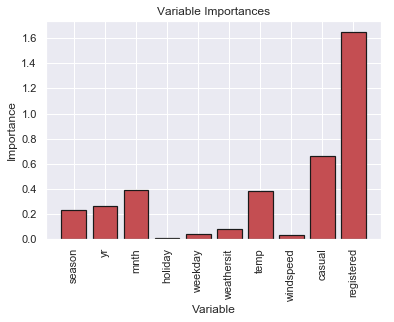

In [96]:
# list of x locations for plotting
x_values = list(range(len(mir_result)))

# Make a bar chart
plt.bar(x_values, mir_result, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)


# Tick labels for x axis
plt.xticks(x_values, train_variables_one_1, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [97]:
#Above graph is stating  that  only  few features are important to decide the  accuracy of the model
# Now we will check our model accuracy  by reducing features

train_feature_two = train[["yr" ,"mnth","weekday","workingday","temp","casual","registered"]].values
test_feature_two= test[["yr" ,"mnth","weekday","workingday","temp","casual","registered"]].values

In [98]:
# build random forest model

Rf_model_two = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_feature_two,train_target_feature)
print(Rf_model_two)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False)


In [99]:
# Predict the model using predict funtion

RF_predict_two= Rf_model_two.predict(test_feature_two)
print(RF_predict_two)

[7014.604 4619.342 3715.092 1691.26  5275.18  6760.298 3369.886 1227.542
 4616.456 6274.594 6997.014 2308.974 6686.95  6554.558 1980.158 2701.608
 5438.272 2758.824 7516.75  2397.196 4563.84  4793.116 1520.426 4583.51
  629.656 5114.12  7602.232 7451.72  3666.154 4602.912 3170.116 1159.934
 6574.24  2376.17  4122.55  2409.882 7452.906 5553.222 7674.74  4849.362
 3894.662 6908.13  4125.804 4879.792 3749.218 6277.718 3356.762 3168.204
 7120.806 1664.686 7581.318 6194.55  4625.166 5559.542 3620.58  7893.682
 5021.514 3651.232 4843.77  2197.446 2133.514 1722.22  7670.902 1817.306
 4964.144 7524.858 4106.87  4668.972 3607.444 4035.136 1951.176 5082.934
 1004.828 5934.81  1284.64  5941.908 5859.684 7732.166 5481.342  542.236
 6597.554 1949.486 5354.608 3740.114  840.872 2704.818 6894.032 1742.79
 3245.756 4258.666  742.614 1697.244 7021.934 5768.84  7853.484 4248.402
 4512.94  4171.284 7679.376 2174.582 1034.38  8202.668 5634.228 1071.982
 5321.948 1701.614 5045.836 4364.662 3289.7   4326.15

In [100]:
#Evaluate Random forest using  MAPE 

MAPE(test_target_feature,RF_predict_two)

18.048445543561126

In [101]:
#Here it is stating accuracy of the model increases slightly

In [102]:
#Evaluate  Model usinf  RMSE

RMSE(test_target_feature,RF_predict_two)

# Accuracy and  RMSE is improved  

Mean Square :  16200.411406748291
Root Mean Square :  127.28083676165981


127.28083676165981

## Linear Regression

In [104]:
#here  same features are taking  what we took for the Linear Regression
#train_features_one = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#train_target_feature = train['cnt'].values
#test_feature = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
#test_target_feature= test['cnt'].values
#test_target_feature

In [105]:
#import  linear regreesion  

import statsmodels.api as sm

In [106]:
#develop Linear Regression model using sm.ols

linear_regression_model = sm.OLS(train_target_feature, train_features_one).fit()

In [107]:
#Summary of model
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.118e+32
Date:                Sun, 19 May 2019   Prob (F-statistic):               0.00
Time:                        14:01:16   Log-Likelihood:                 14575.
No. Observations:                 584   AIC:                        -2.913e+04
Df Residuals:                     574   BIC:                        -2.909e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.979e-13   2.67e-13      1.492      0.136   -1.26e-13    9.22e-13
x2         -2.018e-12   4.68e-13     -4.316      0.000   -2.94e-12    -1.1e-12
x3         -1.315e-13   7.81e-14     -1.684      0.093   -2.85e-13    2.18e-14
x4         -9.095e-13   9.68e-13     -0.940      0.348   -2.81e-12    9.92e-13
x5         -7.816e-14   7.31e-14     -1.069      0.286   -2.22e-13    6.55e-14
x6          1.137e-13    2.6e-13      0.437      0.662   -3.97e-13    6.25e-13
x7                  0   1.22e-12          0      1.000    -2.4e-12     2.4e-12
x8         -1.819e-12   1.67e-12     -1.087      0.278   -5.11e-12    1.47e-12
x9             1.0000   2.74e-16   3.64e+15      0.000       1.000       1.000
x10            1.0000    1.9e-16   5.27e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       41.358   Durbin-Watson:                   0.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.309
Skew:                           0.693   Prob(JB):                     3.24e-11
Kurtosis:                       3.257   Cond. No.                     4.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
#predict the  model

predict_LR = linear_regression_model.predict(test_feature)

In [109]:
#print
print(predict_LR)

[7333. 4579. 3717. 1650. 5336. 6770. 3322. 1167. 4672. 6273. 6998. 2311.
 6691. 6565. 1944. 2566. 6043. 2765. 7580. 2402. 4548. 4785. 1501. 4592.
  683. 5130. 7697. 7415. 3614. 4660. 3204. 1204. 6544. 2425. 4098. 2424.
 7461. 5572. 7765. 4862. 3867. 7109. 4109. 4891. 3747. 6398. 3409. 3351.
 7058. 1607. 7538. 6230. 4679. 5538. 3606. 8156. 5026. 3659. 4835. 2162.
 2121. 1787. 7720. 1795. 4991. 7665. 4094. 4648. 3644. 4023. 1872. 5255.
 1011. 5729. 1495. 6591. 6043. 7852. 5445.   22. 6572. 1913. 5375. 3750.
 1013. 2594. 6883. 1712. 3351. 4318.  605. 1685. 7055. 5847. 8167. 4308.
 4459. 4205. 7693. 2192. 1005. 8555. 5634. 1115. 5319. 1683. 5062. 4362.
 3285. 4401. 4521. 4717. 1096. 4940. 3267. 3115.  822. 5312. 1635. 1708.
 3974. 7444. 4128. 5345. 3068. 1796. 7030. 7499. 3907. 6786. 4649. 4665.
 4586. 5099. 7421. 3422. 4541. 4760. 6203. 6597. 7129. 4334. 6966.  986.
 6639. 5459. 4352.]


In [110]:
#evaluate model using MAPE

MAPE(test_target_feature,predict_LR)

1.4210617552864843e-13

In [111]:
#Predict the model using  RMSE

RMSE(test_target_feature,predict_LR)

Mean Square :  1.291576471861523e-23
Root Mean Square :  3.593850959432685e-12


3.593850959432685e-12

# Conclusion

In [112]:
#Decision Tree:

#Mean Square :  79226.90837681163
#Root Mean Square : 281.4727489061981


#Random Forest:

#Mean Square :  16200.411406748291
#Root Mean Square :  127.28083676165981


#Linear Regression

#Mean Square :   1.291576471861523e-23
#Root Mean Square : 3.593850959432685e-12


In [ ]:
# Linear regression is the  best model for the dataset